# B02.Data_Filtering

- **Function**: Perform quality assessment and filtering on the adjusted and converted adjusted.cellbin.h5ad files.  
**脚本功能**：对调整及转化后产生的adjusted.cellbin.h5ad文件进行质量评估及过滤  
- **Input**: adjusted.cellbin.h5ad files generated after adjustment and conversion for each sample.  
  **输入**：各样本调整及转化后产生的adjusted.cellbin.h5ad文件.  
- **Processing**: After reading the files, conduct quality control assessment on the data, and perform cell filtering based on the quality control results.  
  **处理过程**：读入文件后，对数据进行质量控制评估，根据质量控制评估，进行细胞过滤。  
- **Output**: Filtered cellbin.h5ad files.  
  **输出**：过滤后的cellbin.h5ad。  

## 0. Package importing 环境导入

In [1]:
import stereo as st
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## 1. Data importing 数据导入

Read according to the h5ad file path in dataLink.
根据dataLink的信息中的h5ad进行读取

In [23]:
dataList = []
dataLink = {
    'CT1':'./processdata/B01.CT1.adjusted.cellbin.h5ad',
    'CT2':'./processdata/B01.CT2.adjusted.cellbin.h5ad',
    'CT3':'./processdata/B01.CT3.adjusted.cellbin.h5ad',
    'EP1':'./processdata/B01.EP1.adjusted.cellbin.h5ad',
    'EP2':'./processdata/B01.EP2.adjusted.cellbin.h5ad',
    'EP3':'./processdata/B01.EP3.adjusted.cellbin.h5ad',
}

                             Processing Sample: CT1                             
++ Starting to read data of sample CT1
++++ Spatial scatter plot of sample CT1


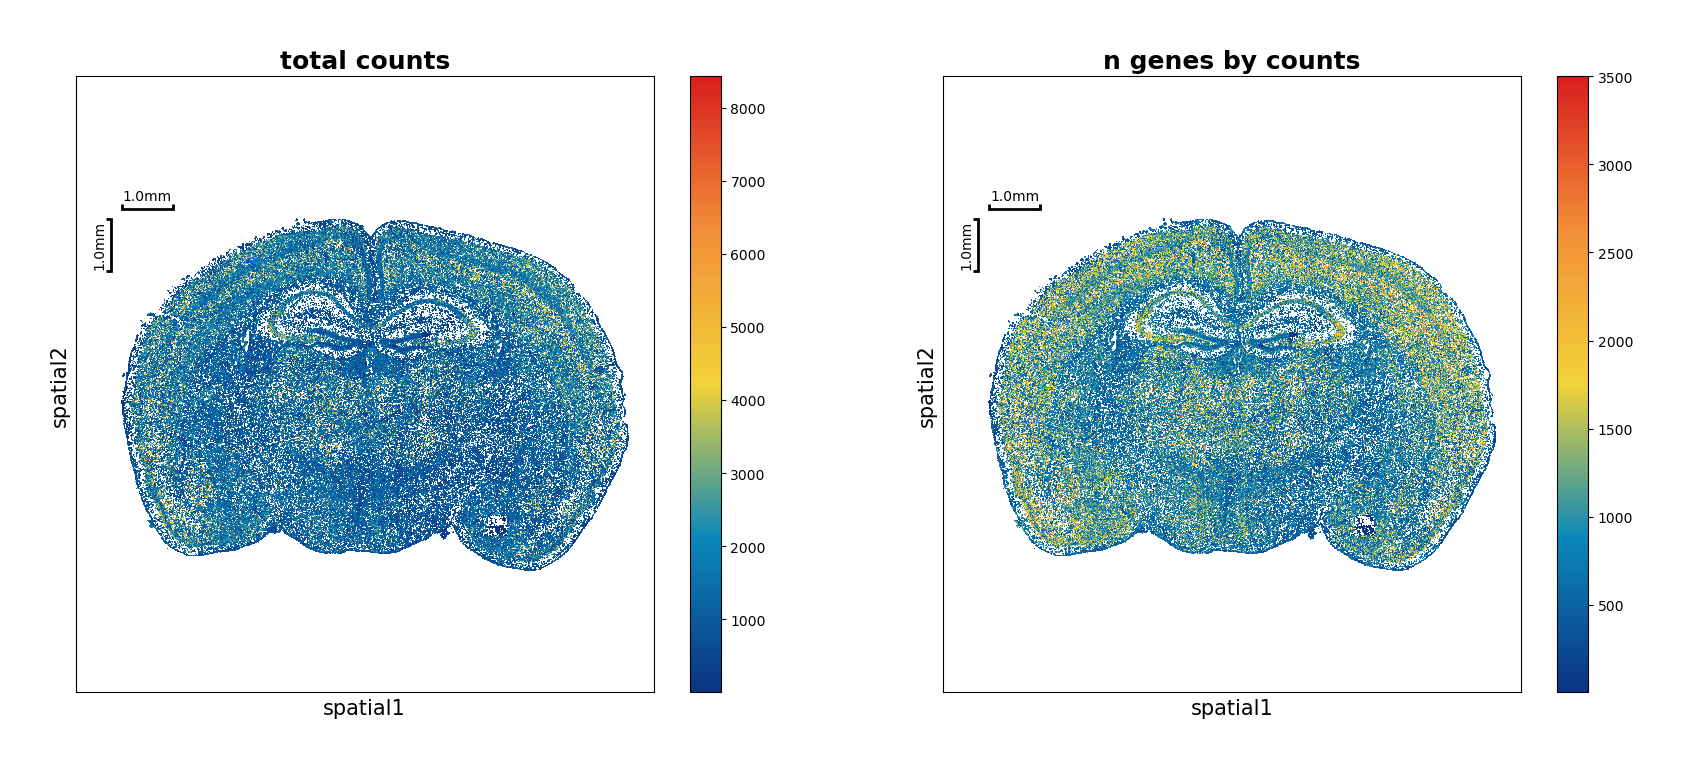

++++ Information of sample CT1
AnnData object with n_obs × n_vars = 145623 × 28871
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_size', 'bin_type', 'key_record', 'sn'
    obsm: 'cell_border', 'spatial'
                             Processing Sample: CT2                             
++ Starting to read data of sample CT2
++++ Spatial scatter plot of sample CT2


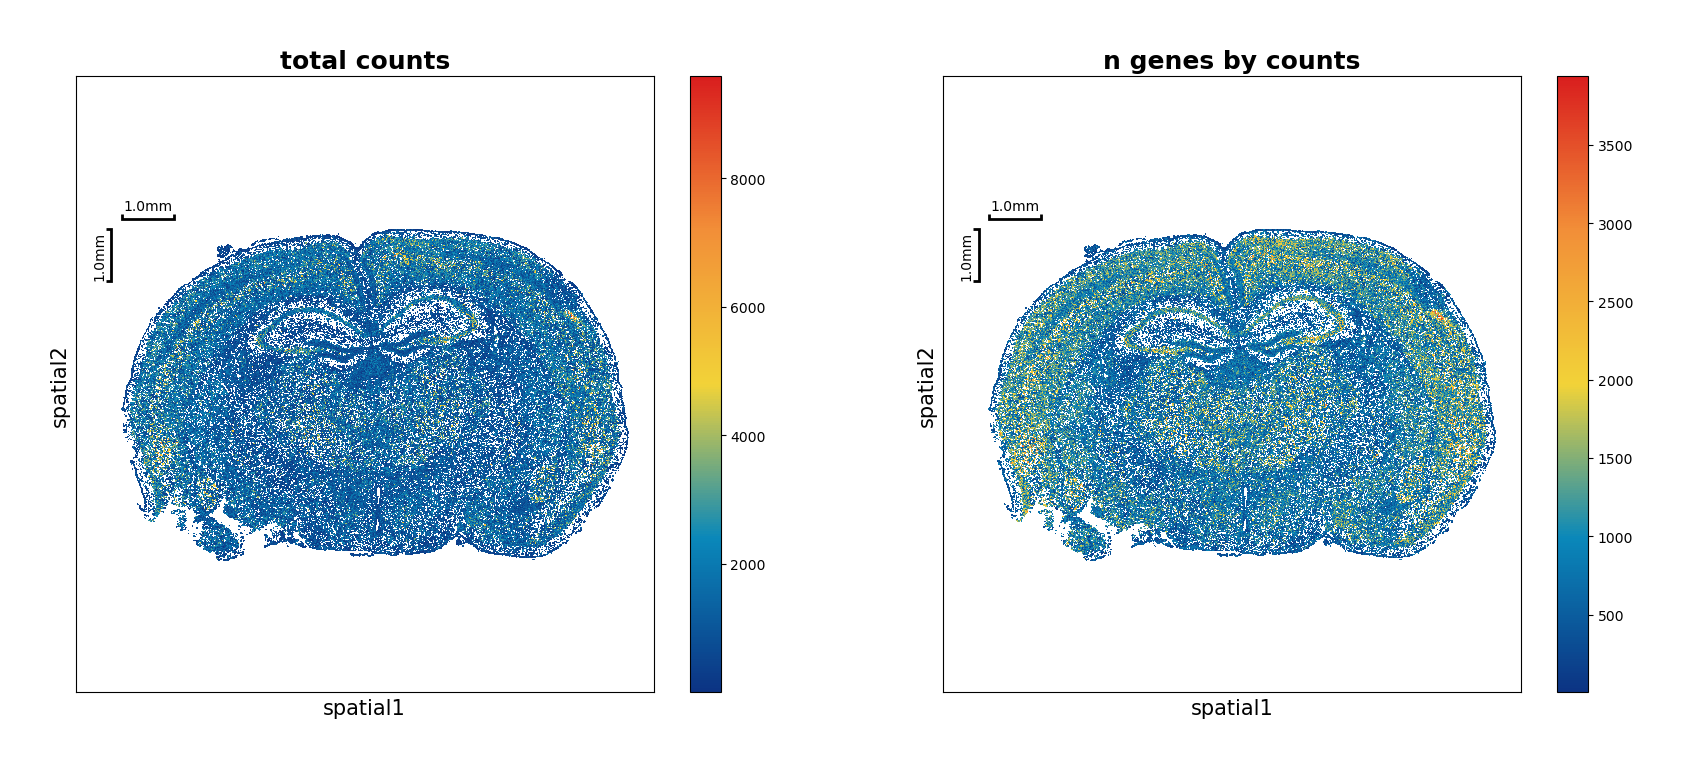

++++ Information of sample CT2
AnnData object with n_obs × n_vars = 144180 × 28807
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_size', 'bin_type', 'key_record', 'sn'
    obsm: 'cell_border', 'spatial'
                             Processing Sample: CT3                             
++ Starting to read data of sample CT3
++++ Spatial scatter plot of sample CT3


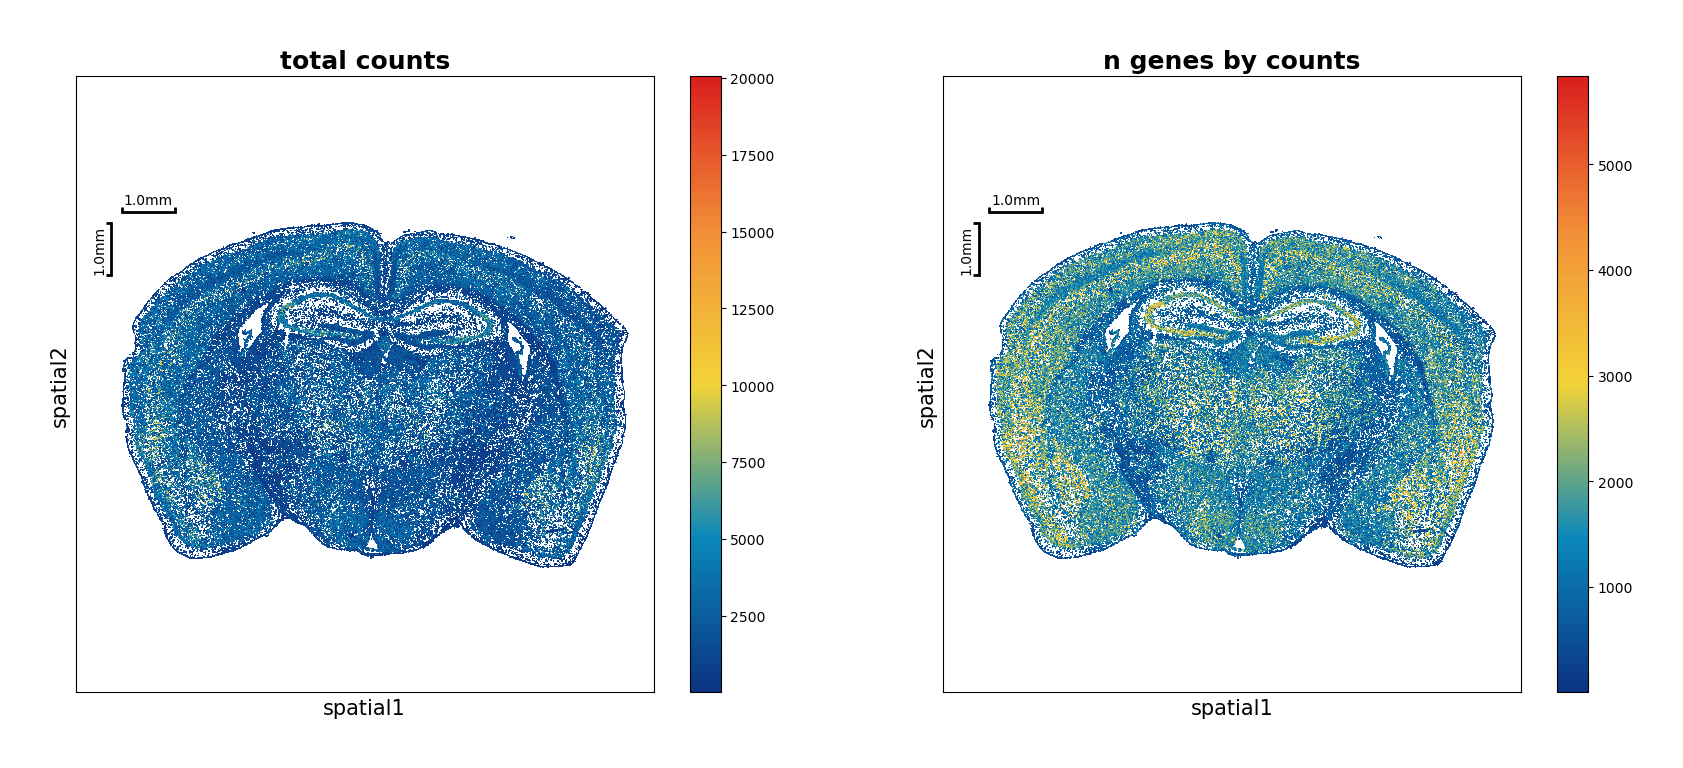

++++ Information of sample CT3
AnnData object with n_obs × n_vars = 115921 × 28846
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_size', 'bin_type', 'key_record', 'sn'
    obsm: 'cell_border', 'spatial'
                             Processing Sample: EP1                             
++ Starting to read data of sample EP1
++++ Spatial scatter plot of sample EP1


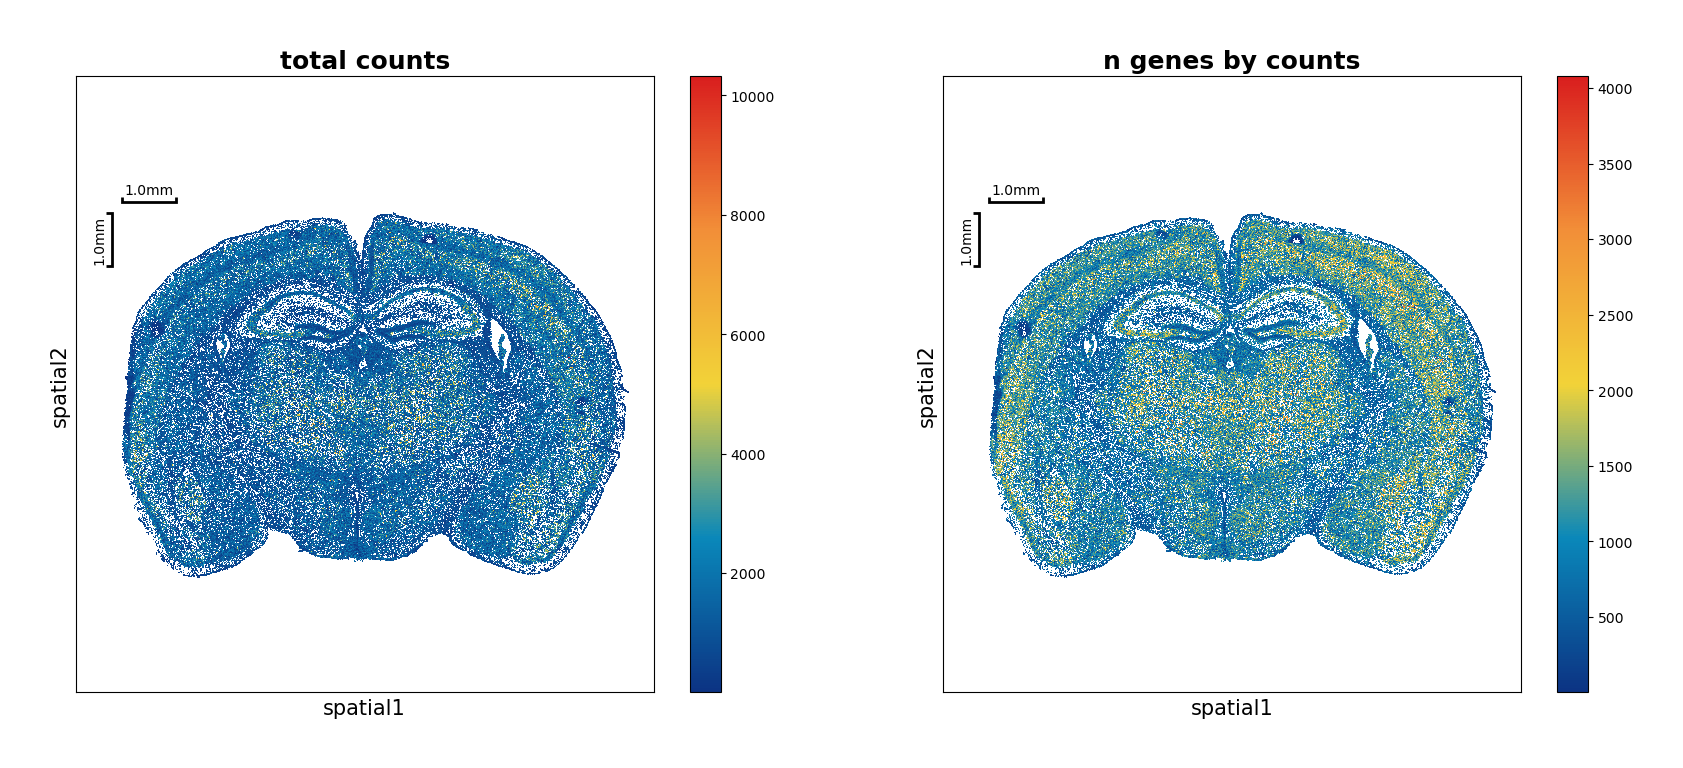

++++ Information of sample EP1
AnnData object with n_obs × n_vars = 166755 × 28819
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_size', 'bin_type', 'key_record', 'sn'
    obsm: 'cell_border', 'spatial'
                             Processing Sample: EP2                             
++ Starting to read data of sample EP2
++++ Spatial scatter plot of sample EP2


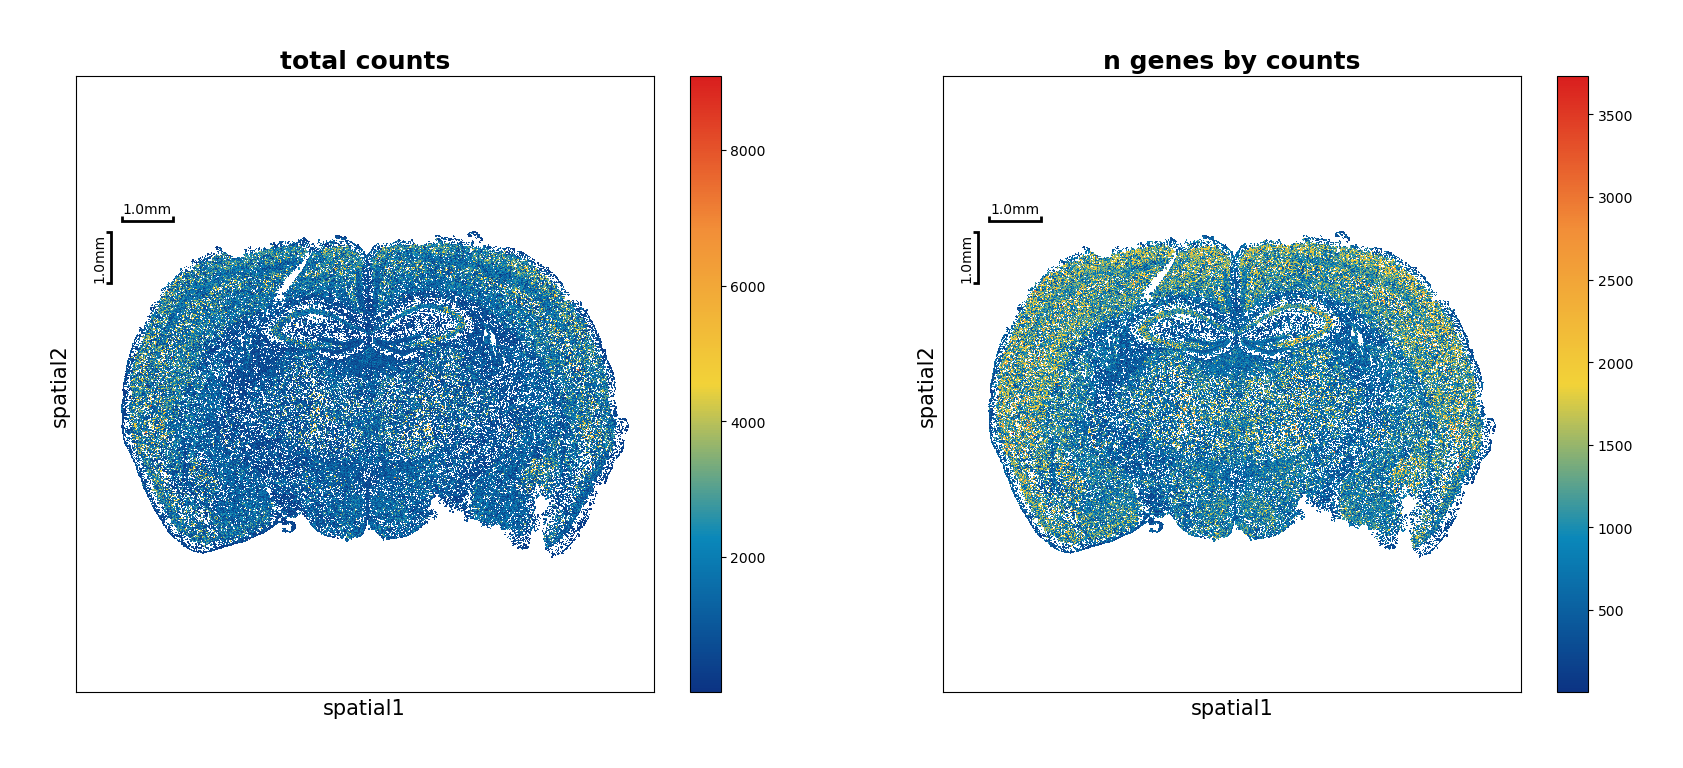

++++ Information of sample EP2
AnnData object with n_obs × n_vars = 148913 × 28750
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_size', 'bin_type', 'key_record', 'sn'
    obsm: 'cell_border', 'spatial'
                             Processing Sample: EP3                             
++ Starting to read data of sample EP3
++++ Spatial scatter plot of sample EP3


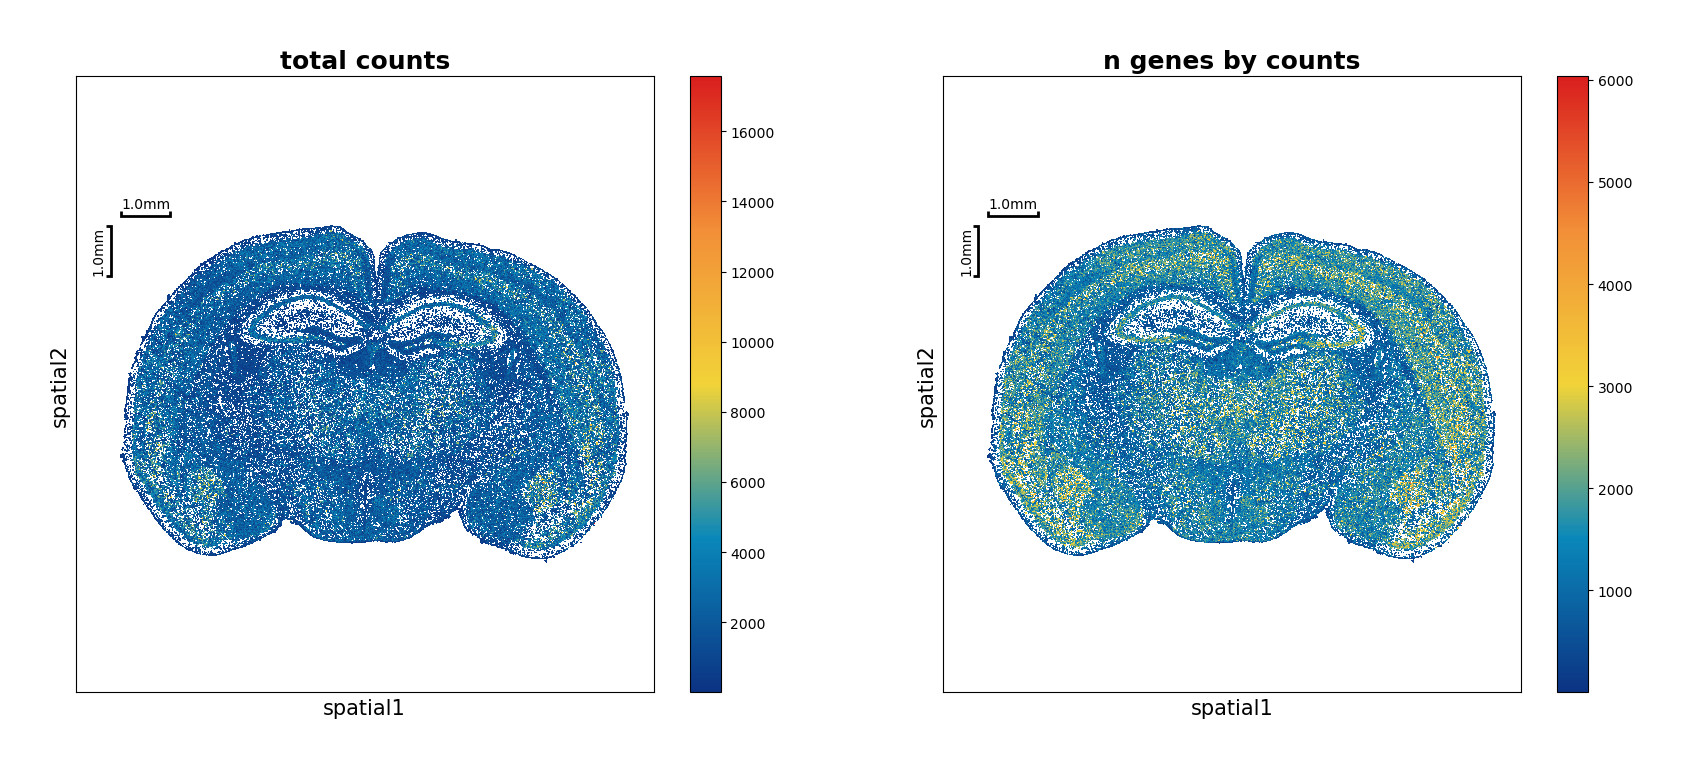

++++ Information of sample EP3
AnnData object with n_obs × n_vars = 119857 × 28920
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y'
    var: 'n_cells', 'n_counts', 'mean_umi'
    uns: 'bin_size', 'bin_type', 'key_record', 'sn'
    obsm: 'cell_border', 'spatial'


In [3]:
# Function to print a separator line
def print_separator():
    print("=" * 80)

# Function to print a header
def print_header(message):
    print_separator()
    print(f"{message:^80}")  # Center the message
    print_separator()

for sample_name, file_path in dataLink.items():
    # Print header for each sample
    print_header(f"Processing Sample: {sample_name}")
    
    # Start reading data
    print(f"++ Starting to read data of sample {sample_name}")
    indata = st.io.read_h5ad(file_path=file_path)
    
    # Perform raw data checkpoint
    indata.tl.raw_checkpoint()
    
    # Assign the sample name to the data object
    indata.samplename = sample_name
    
    # Plot and display the spatial scatter plot
    print(f"++++ Spatial scatter plot of sample {sample_name}")
    indata.plt.spatial_scatter()
    plt.show()  # Force display of the plot
    
    # Print information about the sample data
    print(f"++++ Information of sample {sample_name}")
    print(indata)
    
    # Append the processed data to the dataList
    dataList.append(indata)
    
    # Print footer
    print_separator()

## 2. Data Quality Caculation and Visualization 数据质控及数据表现可视化  
Stereopy provides the data.tl.cal_qc() function to calculate detailed data quality control metrics. This command should be executed sequentially.  
stereopy提供了data.tl.cal_qc()统计数据质控的详细数据，需依次运行该命令.  

In [4]:
for i in dataList:
    i.tl.cal_qc()

[2024-12-31 17:41:18][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run cal_qc...
[2024-12-31 17:41:24][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: cal_qc end, consume time 5.6814s.
[2024-12-31 17:41:24][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run cal_qc...
[2024-12-31 17:41:30][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: cal_qc end, consume time 5.2776s.
[2024-12-31 17:41:30][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run cal_qc...
[2024-12-31 17:41:36][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: cal_qc end, consume time 6.5073s.
[2024-12-31 17:41:36][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run cal_qc...
[2024-12-31 17:41:43][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: cal_qc end, consume time 6.8600s.
[2024-12-31 17:41:43][Stereo][45323][MainThread][140

### 2.1 Data quality 数据质量表现  
After executing **data.tl.cal_qc()**, the statistical data is stored in **data.genes** and **data.cells** respectively.  
**data.tl.cal_qc()** 统计后，数据统计数据分别存储在**data.genes**和**data.cells**中。  

In [5]:
dataList[0].genes.to_df().head(5)

n_cells  n_counts  mean_umi
Gnai3     4594      5181  1.127775
Pbsn       221       237  1.072398
Cdc45      241       251  1.041494
H19         25        29  1.160000
Scml2      361       375  1.038781

In [6]:
dataList[0].cells.to_df().head(5)

dnbCount  area  total_counts  n_genes_by_counts  \
42477226563225        53   199           119                 89   
42425686955677       160   329           434                297   
42408507086514       284   681           604                409   
42361262446241        78   160           192                144   
42335492642438       121   266           294                216   

                pct_counts_mt orig.ident     x     y  
42477226563225       1.680672     sample  9890  5785  
42425686955677       2.764977     sample  9878  5789  
42408507086514       2.152318     sample  9874  5810  
42361262446241       3.645833     sample  9863  5793  
42335492642438       3.401361     sample  9857  5766

You can use **data.plt.violin()** provided by stereopy for visualization to examine the performance of each dataset.  
可使用stereopy提供的**data.plt.violin()** 可视化，查看每个数据的数据表现。   

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

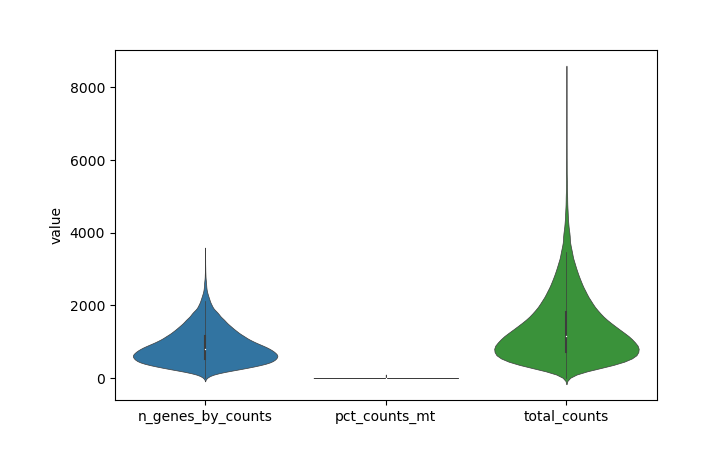

In [7]:
dataList[0].plt.violin()

You can use **data.plt.genes_count()** provided by Stereopy for visualization to examine the performance of each dataset.  
可使用stereopy提供的**data.plt.genes_count()** 可视化，查看每个数据的数据表现.  

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

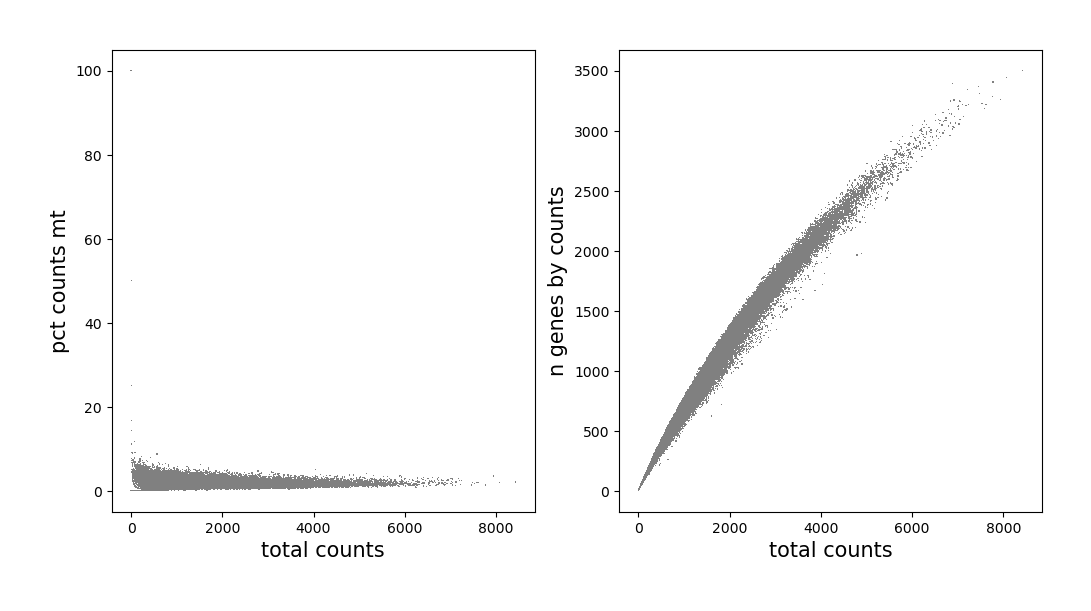

In [8]:
dataList[0].plt.genes_count()

### 2.2 comparison of the data quality across all sample  比较所有样本数据表现  
Since there are six samples in this study, we will conduct a unified comparison of data quality across all samples. The comparison will be based on three criteria: total molecule counts (total_counts), genes types (n_genes_by_counts), and the proportion of mitochondrial genes (pct_counts_mt).  

由于本研究中有6个样本，因此统一对比所有样本的数据质量。分别从三个标准进行对比，包括分子数total_counts，基因数n_genes_by_counts，以及线粒体基因比例pct_counts_mt  

In [9]:
# Initialize an empty list for cell information
cellsdfList = []

# Extract cell information from each sample's dataset, i.e., data[i].cells, and add it to the cell information list
for index, data in enumerate(dataList):
    cellsdf = data.cells.to_df().copy(deep=True)
    cellsdf.index = cellsdf.index + f'-{index}'
    cellsdf['Sample_name'] = data.samplename
    cellsdfList.append(cellsdf)

# Concatenate the cell information list into a single DataFrame by rows and name it cellsdf
cellsdf = pd.concat(cellsdfList, axis=0)
cellsdf.tail(5)

dnbCount  area  total_counts  n_genes_by_counts  \
56538949506388-5       826  2569          1275                947   
56341381010689-5       113   497           136                121   
57397942965508-5       258   848           387                314   
57277683881217-5       243   785           360                300   
57174604666146-5       172   796           233                215   

                  pct_counts_mt orig.ident            x            y  \
56538949506388-5       3.607843     sample -2555.477948  3707.522513   
56341381010689-5       2.205882     sample -2463.818460  3732.089527   
57397942965508-5       2.067183     sample -2636.862438  3906.963143   
57277683881217-5       3.055556     sample -2615.253984  3888.905603   
57174604666146-5       1.716738     sample -2622.320397  3848.717722   

                 Sample_name  
56538949506388-5         EP3  
56341381010689-5         EP3  
57397942965508-5         EP3  
57277683881217-5         EP3  
57174604666146-5         EP3

Compare the distribution of molecule counts for each cell across the six samples.  

比较6个样本的每个细胞的分子数分布  

<Axes: xlabel='Sample_name', ylabel='total_counts'>

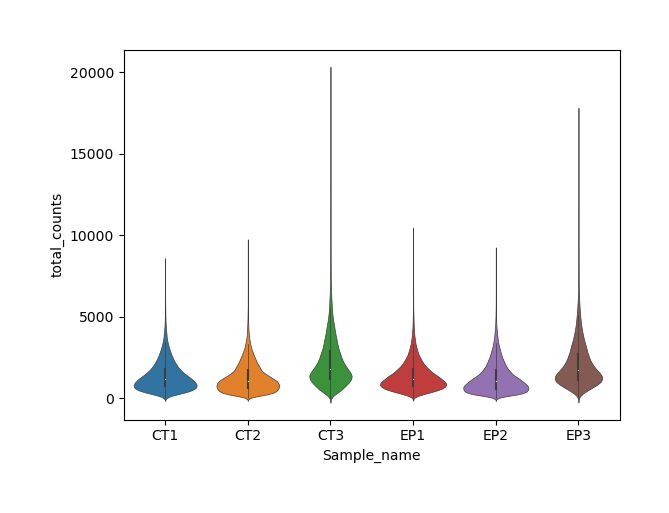

In [10]:
sns.violinplot(cellsdf,x='Sample_name',y='total_counts')

Compare the gene distribution for each cell across the six samples.  

比较6个样本的每个细胞的基因分布

<Axes: xlabel='Sample_name', ylabel='n_genes_by_counts'>

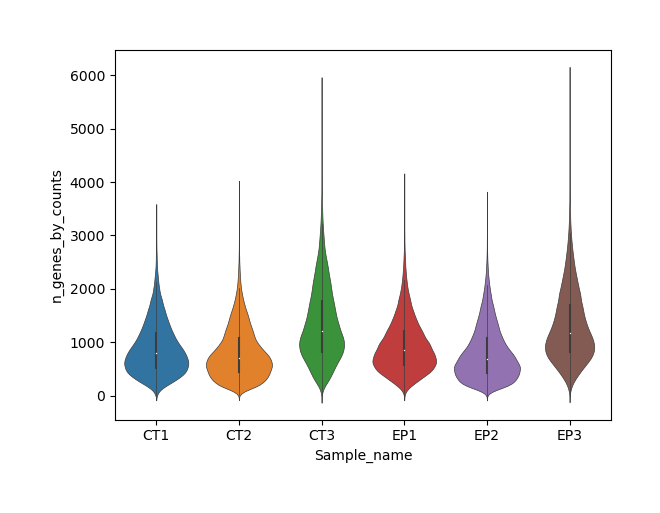

In [11]:
sns.violinplot(cellsdf,x='Sample_name',y='n_genes_by_counts')

Compare the mitochondrial gene distribution for each cell across the six samples.

比较6个样本的每个细胞的线粒体基因分布

<Axes: xlabel='Sample_name', ylabel='pct_counts_mt'>

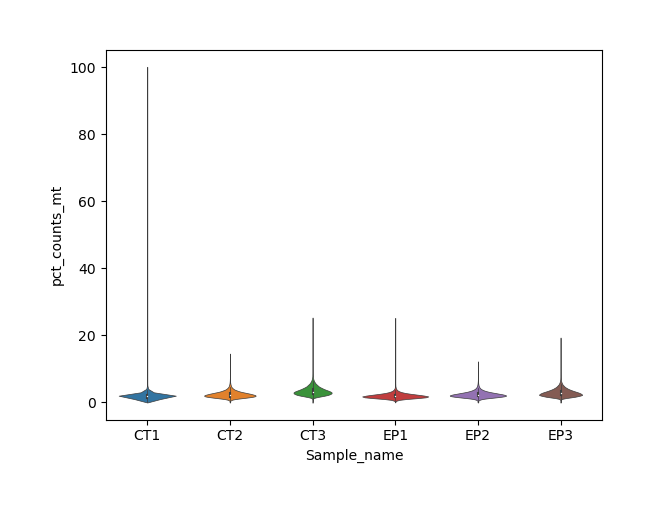

In [12]:
sns.violinplot(cellsdf,x='Sample_name',y='pct_counts_mt')

### 3.3 Testing Data Filtering Parameters for All Samples 测试所有样本的数据过滤参数  
From the comparison above, it is evident that different samples exhibit varying data quality, particularly CT3 and EP3, which significantly exceed other samples. By using the custom QCsplot, you can see how many cells are filtered out by each parameter.  

从上方横向对比发现，不同的样本存在不同的数据表现，特别是CT3和EP3具有远超于其他样本，使用自编写的QCsplot可以查看每个参数过滤掉多少细胞数.

In [13]:
def QCsplot(adata, maxmt, mingene, maxgene):
    """
    Plot the distribution of quality control metrics
    """
    fig, axs = plt.subplots(1, 2, figsize=(20, 4))
    
    # Set overall style
    sns.set(style="whitegrid")
    
    # Plot the distribution of mitochondrial gene percentage
    sns.histplot(adata.cells["pct_counts_mt"], kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title('Mitochondrial Counts (%)')
    axs[0].set_xlabel('Percentage')
    axs[0].set_ylabel('Frequency')

    axs[0].axvline(x=5, color='red', linestyle='--', label='Cutoff at 5')

    # Calculate the number of cells meeting the condition
    low_count_cells = (adata.cells["pct_counts_mt"] >= maxmt).sum()
    
    # Add text annotation
    axs[0].text(0.05, 0.95, f'Cells >= {maxmt}: {low_count_cells}', transform=axs[0].transAxes, fontsize=12, verticalalignment='top', color='red')
    
    
    # Plot the distribution of gene counts
    sns.histplot(adata.cells["n_genes_by_counts"], kde=True, bins=60, ax=axs[1], color='teal')
    axs[1].set_title('Number of Genes')
    axs[1].set_xlabel('Number of Genes')
    axs[1].set_ylabel('Frequency')

    axs[1].axvline(x=mingene, color='red', linestyle='--', label='Cutoff at 5')
    axs[1].axvline(x=maxgene, color='blue', linestyle='--', label='Cutoff at 2000')

    # Calculate the number of cells meeting the condition
    low_count_cells = (adata.cells["n_genes_by_counts"] <= mingene).sum()
    high_count_cells = (adata.cells["n_genes_by_counts"] >= maxgene).sum()
    
    # Add text annotation
    axs[1].text(0.05, 0.95, f'Cells <= {mingene}: {low_count_cells}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top', color='red')
    axs[1].text(0.05, 0.90, f'Cells >= {maxgene}: {high_count_cells}', transform=axs[1].transAxes, fontsize=12, verticalalignment='top', color='blue')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

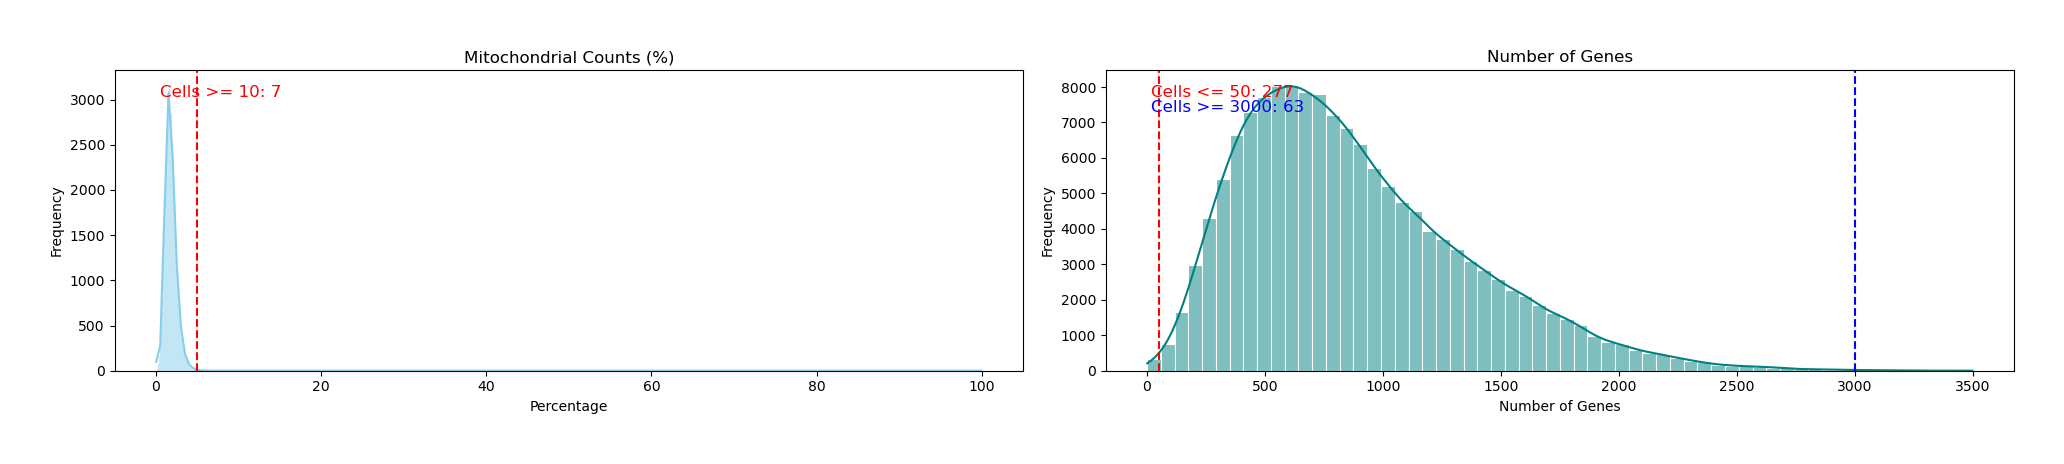

In [14]:
QCsplot(dataList[0], 10, 50, 3000)

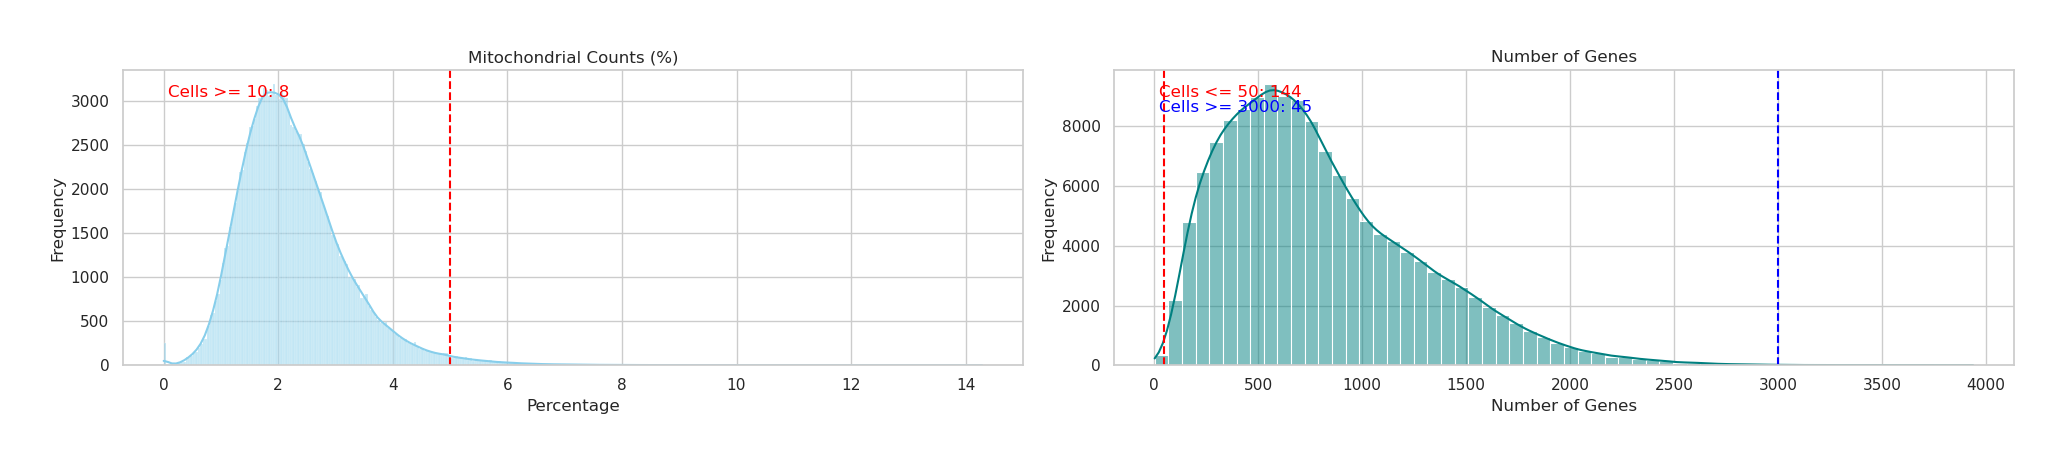

In [15]:
QCsplot(dataList[1],10, 50, 3000)

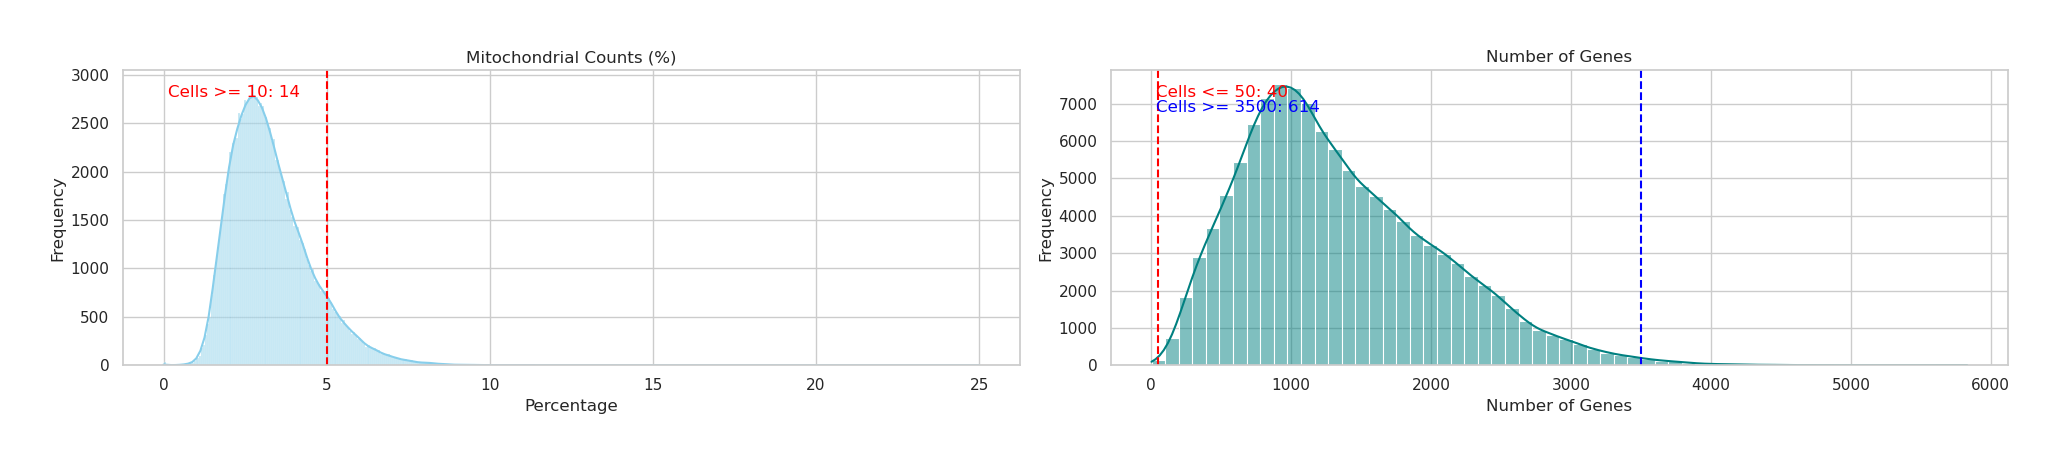

In [16]:
QCsplot(dataList[2], 10, 50, 3500)

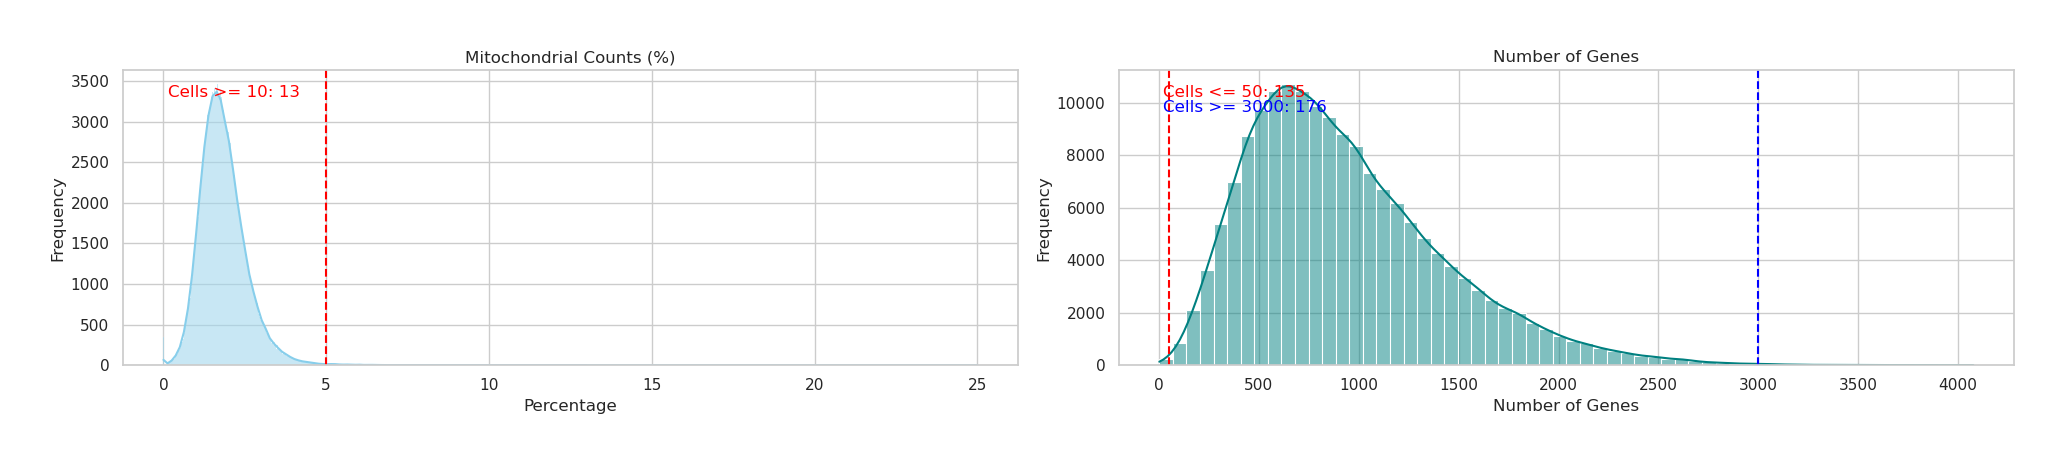

In [17]:
QCsplot(dataList[3], 10, 50, 3000)

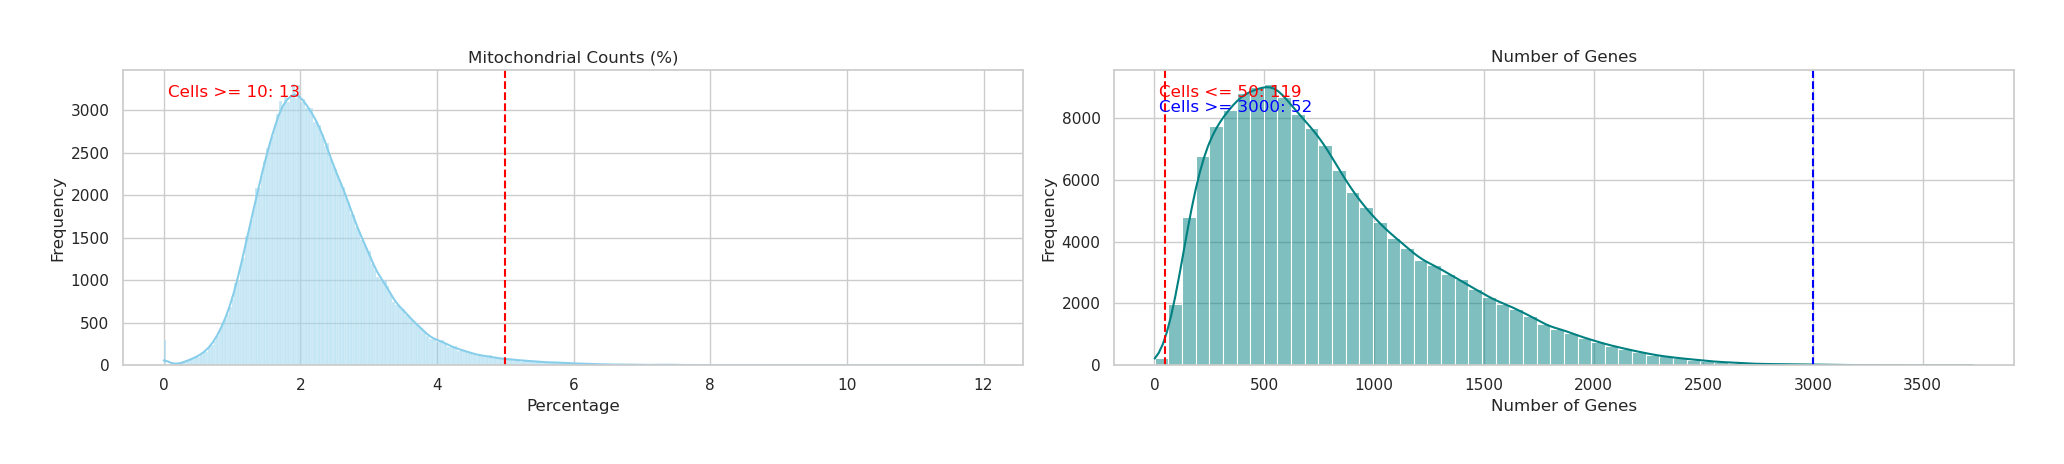

In [18]:
QCsplot(dataList[4],10, 50, 3000)

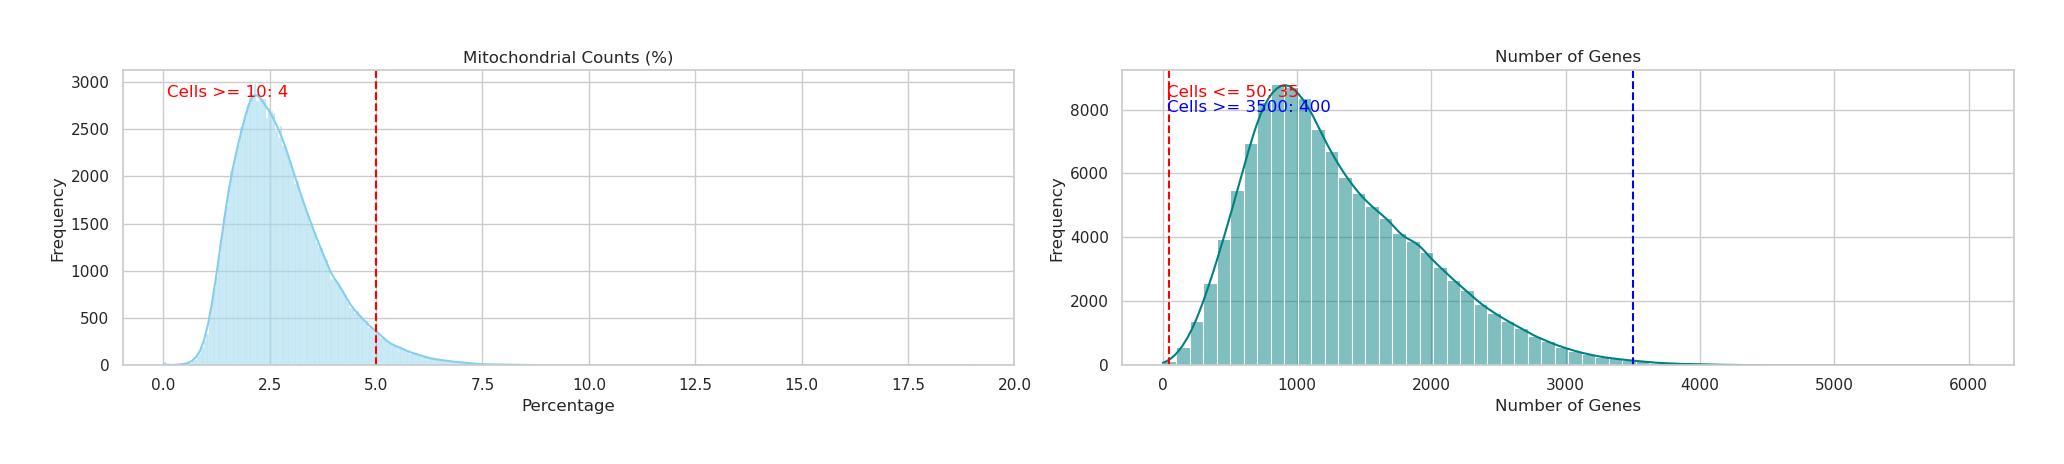

In [19]:
QCsplot(dataList[5],10, 50, 3500)

## 4. Data Filtering 数据过滤
根据以上测试后的筛选标准，过滤低质量细胞.  

Filter out low-quality cells based on the screening criteria established from the above tests.

In [20]:
for i in dataList:
    if i.samplename == "CT3" or i.samplename == "ET3":
        i.tl.filter_cells(
            min_gene=20,
            min_n_genes_by_counts=50,
            max_n_genes_by_counts=3500,
            pct_counts_mt=5,
            inplace=True
            )
    else:
        i.tl.filter_cells(
            min_gene=20,
            min_n_genes_by_counts=50,
            max_n_genes_by_counts=3000,
            pct_counts_mt=5,
            inplace=True
            )

[2024-12-31 17:42:37][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run filter_cells...
[2024-12-31 17:42:47][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: filter_cells end, consume time 9.7232s.
[2024-12-31 17:42:47][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run filter_cells...
[2024-12-31 17:42:56][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: filter_cells end, consume time 9.0896s.
[2024-12-31 17:42:56][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run filter_cells...
[2024-12-31 17:43:07][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: filter_cells end, consume time 11.1315s.
[2024-12-31 17:43:07][Stereo][45323][MainThread][140542919731008][st_pipeline][41][INFO]: start to run filter_cells...
[2024-12-31 17:43:19][Stereo][45323][MainThread][140542919731008][st_pipeline][44][INFO]: filter_cells end, consume time 11.7043s.
[2

Since Stereopy utilizes the data in **data.raw** to execute certain analysis commands, it is recommended to use **data.tl.raw_checkpoint()** after modifying the number of cells or genes in the dataset. This ensures that the **data.raw** data is updated and consistent, preventing potential errors in subsequent analyses.  

由于stereopy会使用**data.raw** 中的数据来执行某些分析命令，在改更数据集的细胞数或基因数后，建议使用**data.tl.raw_checkpoint()** 来同步保持**data.raw** 数据的更新，从而保持与**data.raw** 的一致，同时也能防止后续报错。  

In [21]:
for i in dataList:
    i.tl.raw_checkpoint()

## 5. Save filtered Data 存储过滤数据
Use **stereo.io.stereo_to_anndata** to store the filtered data.  

使用**stereo.io.stereo_to_anndata** 存储过滤后数据。 

In [22]:
for i in dataList:
    st.io.stereo_to_anndata(i,flavor='scanpy',output=f"./processdata/B02.{i.samplename}.adjusted.cellbin.h5ad")

[2024-12-31 17:44:06][Stereo][45323][MainThread][140542919731008][reader][914][INFO]: Adding sample in adata.obs['orig.ident'].
[2024-12-31 17:44:06][Stereo][45323][MainThread][140542919731008][reader][1062][INFO]: Adding data.tl.raw.exp_matrix as adata.raw .
[2024-12-31 17:44:06][Stereo][45323][MainThread][140542919731008][reader][1084][INFO]: Finished conversion to anndata.
[2024-12-31 17:45:01][Stereo][45323][MainThread][140542919731008][reader][1088][INFO]: Finished output to ./processdata/B02.CT1.adjusted.cellbin.h5ad
[2024-12-31 17:45:03][Stereo][45323][MainThread][140542919731008][reader][914][INFO]: Adding sample in adata.obs['orig.ident'].
[2024-12-31 17:45:03][Stereo][45323][MainThread][140542919731008][reader][1062][INFO]: Adding data.tl.raw.exp_matrix as adata.raw .
[2024-12-31 17:45:03][Stereo][45323][MainThread][140542919731008][reader][1084][INFO]: Finished conversion to anndata.
[2024-12-31 17:45:56][Stereo][45323][MainThread][140542919731008][reader][1088][INFO]: Finis